<p style="color:dodgerblue; font-size: 25px; text-align:center;">
    <b>In this part we are going to do Exploratory Data Analysis of the data that we scraped in part 1.</b>
</p>
<p>
<b> Outline of this part: </b>
    <li>Pull the data from DB</li>
    <li>Data Preprocessing</li>
    <li>EDA</li>
<p>

In [9]:
#libraries
import pandas as pd

<p style="color:dodgerblue; font-size: 25px;"><b>1. Pulling data from DB<b><p>

In [4]:
import psycopg2 #allows operations with DB

In [5]:
#connect to database
conn = psycopg2.connect(dbname= 'dbname', user= 'user', password= 'password')

In [6]:
#create cursor to do DB operations
cur = conn.cursor()

In [7]:
cur.execute("SELECT * FROM main") #taking all the values from main table

In [8]:
main = pd.DataFrame(cur.fetchall())

In [9]:
main.columns = [_.name for _ in cur.description]

In [10]:
cur.close() #closing connection
conn.close()

In [11]:
main.head(3)

,startup,size,CB rank,Total funding,Last funding type,Investments,Acquisitions,Team members,Founded date,IPO status,Operating status,Company type,country,city,desctiption,url
0,200crowd,11-50,"39,694",€300K,Seed,NaN,NaN,7.0,2015,Private,Active,For Profit,Italy,Milan,200 Crowd is a Crowdfunding platform that conn...,https://200crowd.com
1,24 Ore Business School,1001-5000,"141,808",NaN,NaN,NaN,NaN,2.0,"Nov 9, 1965",Private,Active,For Profit,Italy,Milan,24 Ore Business School is a player in the tert...,https://bs.ilsole24ore.com
2,24sessions,11-50,"14,516",$1.5M,Series A,NaN,NaN,6.0,"Oct 1, 2015",Private,Active,For Profit,Netherlands,Amsterdam,The SaaS solution to meet customers face-to-fa...,https://24sessions.com


<p style="font-size:25px">
    <i>
        <b>
        Now we are ready to preprocess our main dataframe.
        </b>
    </i>
</p>

<p style="color:dodgerblue; font-size: 25px;"><b>2. Data Preprocessing<b><p>

<p style="font-size:20px;">
    Preprocessing of the dataframe will contain the following steps: 
</p>
<br>
    <li>Setting the proper type of values</li>
    <li>Getting rid of days and months from <b>Founded date</b> column and leaving only years</li>
    <li>Setting one <b>$</b> currency for all values of <b>Total funding</b> column</li>
    
    

<p>Short description of dataframe</p>

In [12]:
main.describe()

,startup,size,CB rank,Total funding,Last funding type,Investments,Acquisitions,Team members,Founded date,IPO status,Operating status,Company type,country,city,desctiption,url
count,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843,843
unique,843,10,830,613,26,809,700,69,363,2,3,2,7,42,843,843
top,AdvisorEat,11-50,NaN,NaN,Series A,1.0,1.0,3.0,2014,Private,Active,For Profit,Spain,Paris,Outfittery provides an online personal shoppin...,https://comtravo.com/en/
freq,1,288,6,23,139,24,79,141,60,826,840,841,121,107,1,1


In [13]:
main.dtypes

startup              object
size                 object
CB rank              object
Total funding        object
Last funding type    object
Investments          object
Acquisitions         object
Team members         object
Founded date         object
IPO status           object
Operating status     object
Company type         object
country              object
city                 object
desctiption          object
url                  object
dtype: object

In [18]:
#converting 'NaN' strings to *NaN* data type
for c in main.columns:
    main.loc[main.loc[:,c] == 'NaN', c] = pd.np.nan

In [19]:
main.loc[:,'CB rank'] = pd.to_numeric(main.loc[:,'CB rank'].str.replace(',',''),downcast= 'float')
main.loc[:,'Acquisitions'] = pd.to_numeric(main.loc[:,'Acquisitions'],downcast= 'float')
main.loc[:,'Investments'] = pd.to_numeric(main.loc[:,'Investments'],downcast= 'float')
main.loc[:,'Team members'] = pd.to_numeric(main.loc[:,'Team members'],downcast= 'float')

In [20]:
main.dtypes

startup               object
size                  object
CB rank              float32
Total funding         object
Last funding type     object
Investments          float32
Acquisitions         float32
Team members         float32
Founded date          object
IPO status            object
Operating status      object
Company type          object
country               object
city                  object
desctiption           object
url                   object
dtype: object

In [21]:
main.describe() #excludes null values

,CB rank,Investments,Acquisitions,Team members
count,837.000000,51.000000,158.000000,807.000000
mean,17801.265625,20.392157,3.025316,6.258984
std,31197.175781,69.512901,4.260542,5.719332
min,28.000000,1.000000,1.000000,1.000000
25%,3255.000000,1.000000,1.000000,3.000000
50%,9610.000000,2.000000,1.500000,5.000000
75%,22092.000000,9.500000,3.000000,8.000000
max,456264.000000,445.000000,31.000000,63.000000


Let's see the percentage of missing values we have for each column

In [22]:
nan_percentage = ['{}%'.format(round(i,2)) for i in main.isnull().sum()/len(main) * 100]

In [23]:
pd.concat([pd.Series(main.columns),pd.Series(nan_percentage)],
          axis= 1, 
          keys= ['Columns', 'Missing values']).sort_values('Missing values', ascending=False)

,Columns,Missing values
5,Investments,93.95%
6,Acquisitions,81.26%
7,Team members,4.27%
3,Total funding,2.73%
4,Last funding type,2.37%
2,CB rank,0.71%
1,size,0.36%
8,Founded date,0.36%
0,startup,0.0%
9,IPO status,0.0%


<p>
    Getting rid of days and month from <b>Founded date</b> column.
</p>

In [24]:
def date(x):
    if ',' in x: 
        return x.split(',')[-1]
    else: 
        return x.split()[-1]

In [25]:
main.loc[:,'Founded date'] = main.loc[:,'Founded date'].map(date, na_action= 'ignore')

<p>Converting all the currencies into <b>$</b> and formating them in <b>millions</b></p>

<p><i>First let's see what quantities and currencies we have</i></p>

In [26]:
print(main.loc[:,'Total funding'].map(lambda x: x[-1], na_action= 'ignore').unique())

['K' nan 'M' 'B']


<p>Where:<i> 
    
   <b>K</b> - thousands
    
   <b>M</b> - millions
    
   <b>B</b> - billions</p>

In [27]:
print(main.loc[:,'Total funding'].map(lambda x: x[0], na_action= 'ignore').unique())

['€' nan '$' '£' 'C']


<p><i>The ones that begin with <b>C</b> represent <b>CHF</b> which is currency of Switzerland</i></p>

In [28]:
main.loc[main.loc[:,'Total funding'].str[0] == 'C','Total funding'].head(3)

24    CHF13.6M
48     CHF8.4M
52     CHF5.7M
Name: Total funding, dtype: object


<p><i>Exchange rates as per today from Bank of America are:</i></p>

|CHF-USD|EUR-USD|GBP-USD|
|------|------|------|
|1.0437|1.1239|1.2144|


In [29]:
def currency_change(x):
    '''Changes the currency and format of the input string and returns value in $ rounded to 3 decimal places'''
    r = 0
    if x[0] == '€' : r = float(x[1:-1]) * 1.1239
    elif x[0] == '£' : r = float(x[1:-1]) * 1.2144
    elif x[0] == 'C' : r = float(x[3:-1]) * 1.0437
    else: r = float(x[1:-1]) #if currency is $
    
    if x[-1] == 'B': r *= 1000
    elif x[-1] == 'K': r *= 0.001
    
    return round(r, 3)

In [31]:
main.loc[:,'Total funding'] = main.loc[:,'Total funding'].map(currency_change, na_action= 'ignore')

In [36]:
main.loc[:,'Total funding'].head(5)

0     0.337
1       NaN
2     1.500
3     5.507
4    42.600
Name: Total funding, dtype: float64

In [39]:
main.head(1)

,startup,size,CB rank,Total funding,Last funding type,Investments,Acquisitions,Team members,Founded date,IPO status,Operating status,Company type,country,city,desctiption,url
0,200crowd,11-50,39694.0,0.337,Seed,NaN,NaN,7.0,2015.0,Private,Active,For Profit,Italy,Milan,200 Crowd is a Crowdfunding platform that conn...,https://200crowd.com


<p style="font-size: 20px">
    <b>
        <i>
    Now we are done with the preparation of our data, we can begin our exploratory data analysis.
        </i>
    </b>
</p>

<p style="color:dodgerblue;font-size: 20px;">
    <b>
        <i>
    Which country is the best place for a startup?
        </i>
    </b>
</p>

In [11]:
#libraries for visualization
import plotly.express as px 
import plotly.graph_objects as go

import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

In [12]:
df = pd.concat([main.groupby(['country','city']).mean(),pd.DataFrame(main.groupby(['country','city']).size(),columns=['Startup numbers'])], 
      axis = 1)    

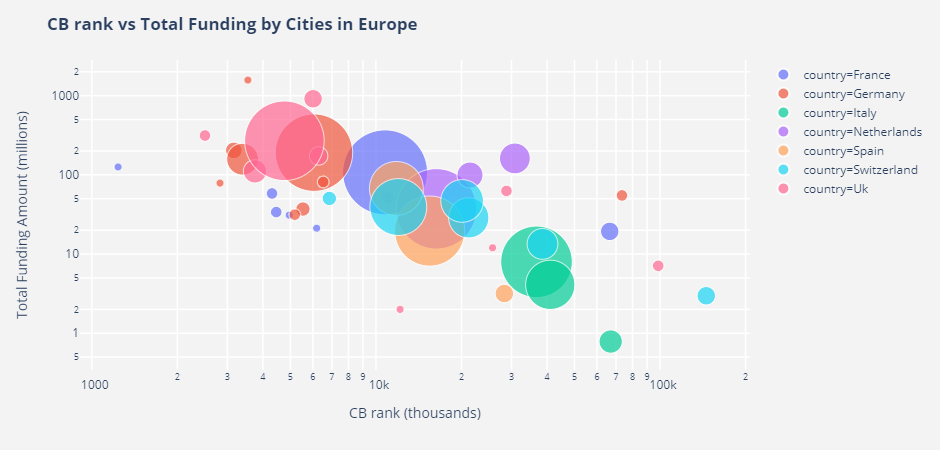

In [13]:
fig = px.scatter(data_frame = df.reset_index(['country','city']), x="CB rank", y="Total funding",
                 color="country",
                 size = 'Startup numbers',
                 hover_name="city",
                 log_x=True, log_y=True,
                 size_max=60)
fig.update_layout(
    title='<b>CB rank vs Total Funding by Cities in Europe<b>',
    xaxis=dict(
        title='CB rank (thousands)',
        gridcolor='white',
        gridwidth=1.5,
    ),
    yaxis=dict(
        title='Total Funding Amount (millions)',
        gridcolor='white',
        gridwidth=1.5,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

From the chart above we can see that startups in UK on average have higher funding and perform better based on their CrunchBase rank, while startups in Italy usually receive less funding and ranked lower among other countries in Europe.


To make our **size** column sorted the way we want, first we convert it into categorical variable, and then set how this categories should be sorted.

In [14]:
main.loc[:,'size'] = main.loc[:,'size'].astype('category')

sorted_size = ['1-10','11-50','51-100','101-250','251-500','501-1000','1001-5000','5001-10000','10001+']

main.loc[:,'size'].cat.set_categories(sorted_size, inplace=True)

Let's plot the figure

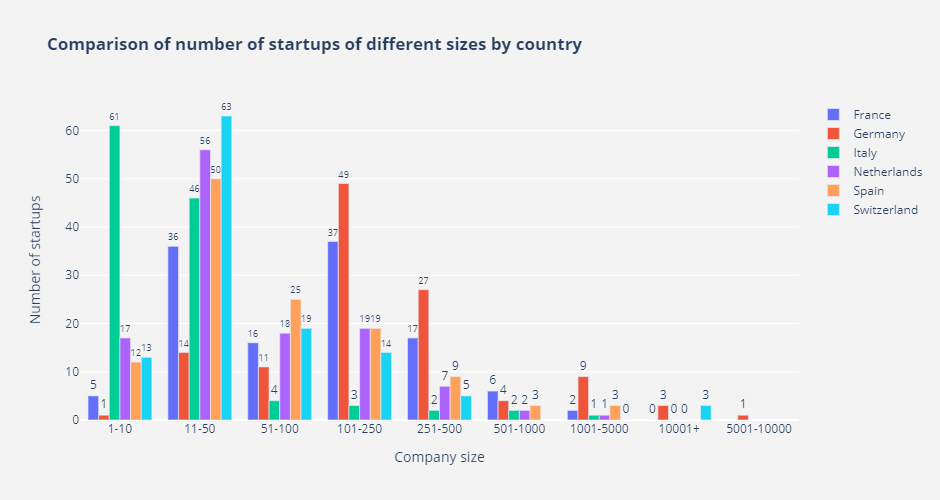

In [15]:
fig1 = go.Figure(
    data=[
        go.Bar(name = 'France',
               x = main.loc[main.loc[:,'country'] == 'France','size'].sort_values().unique(),
               y = main.loc[main.loc[:,'country'] == 'France'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'France'].groupby('size').count()['startup'],
               textposition='outside'),    
        go.Bar(name = 'Germany',
               x = main.loc[main.loc[:,'country'] == 'Germany','size'].sort_values().unique(),
               y = main.loc[main.loc[:,'country'] == 'Germany'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'Germany'].groupby('size').count()['startup'],
               textposition='outside'),    
        go.Bar(name = 'Italy', 
               x = main.loc[main.loc[:,'country'] == 'Italy','size'].sort_values().unique(), 
               y = main.loc[main.loc[:,'country'] == 'Italy'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'Italy'].groupby('size').count()['startup'],
               textposition='outside'),     
        go.Bar(name = 'Netherlands',
               x = main.loc[main.loc[:,'country'] == 'Netherlands','size'].sort_values().unique(),
               y = main.loc[main.loc[:,'country'] == 'Netherlands'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'Netherlands'].groupby('size').count()['startup'],
               textposition='outside'),    
        go.Bar(name = 'Spain', 
               x = main.loc[main.loc[:,'country'] == 'Spain','size'].sort_values().unique(), 
               y = main.loc[main.loc[:,'country'] == 'Spain'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'Spain'].groupby('size').count()['startup'],
               textposition='outside'),   
        go.Bar(name = 'Switzerland', 
               x = main.loc[main.loc[:,'country'] == 'Switzerland','size'].sort_values().unique(), 
               y = main.loc[main.loc[:,'country'] == 'Switzerland'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'Switzerland'].groupby('size').count()['startup'],
               textposition='outside'),  
        go.Bar(name = 'UK',
               x = main.loc[main.loc[:,'country'] == 'UK','size'].sort_values().unique(), 
               y = main.loc[main.loc[:,'country'] == 'UK'].groupby('size').count()['startup'],
               text = main.loc[main.loc[:,'country'] == 'UK'].groupby('size').count()['startup'],
               textposition='outside')
    ])

fig1.update_layout(
    title_text='<b>Comparison of number of startups of different sizes by country<b>',
    yaxis = dict(title='Number of startups'),
    xaxis = dict(title='Company size'),
    width = 870,
    height = 500,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig1.show()

We can see that most of the startups in Italy are very small with 1-10 people, while Switzerland has 3 largest ones with 10001+ employees.

Now let's look at type of companies and their IPO status

Let's graph several categorical values and look how many of them we have. For that we will need to import subplots.

In [16]:
from plotly.subplots import make_subplots

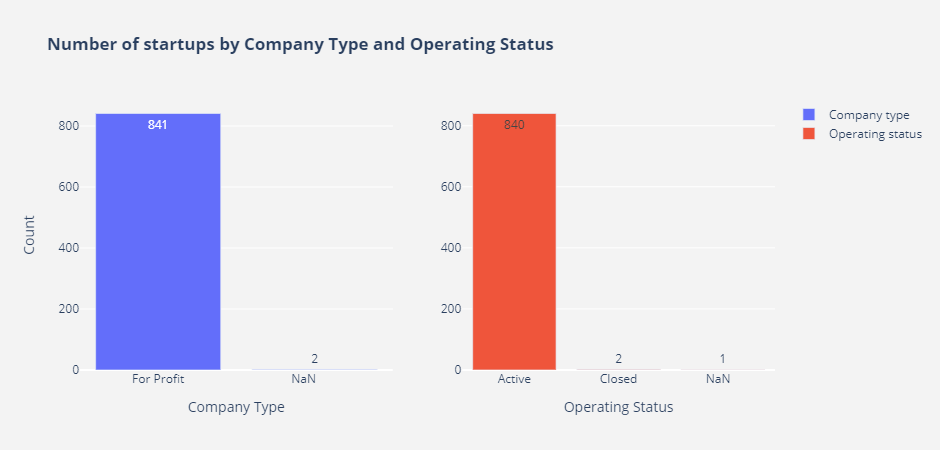

In [17]:
fig2 = make_subplots(rows= 1, cols= 2)

fig2.add_trace(
    go.Bar(name= 'Company type',
           x= main.groupby('Company type').size().index,
           xaxis= 'x1',
           y= main.groupby('Company type').size().values,
           text= main.groupby('Company type').size().values,
           textposition= 'auto'),
    row= 1,col= 1,
    
)
fig2.add_trace(
    go.Bar(name= 'Operating status',
           x= main.groupby('Operating status').size().index,
           xaxis= 'x2',
           y= main.groupby('Operating status').size().values,
           text= main.groupby('Operating status').size().values,
           textposition= 'auto'),
    row= 1,col= 2)

fig2.update_layout(
    title_text='<b>Number of startups by Company Type and Operating Status<b>',
    yaxis = dict(title='Count'),
    xaxis1 = dict(title='Company Type'),
    xaxis2 = dict(title='Operating Status'),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

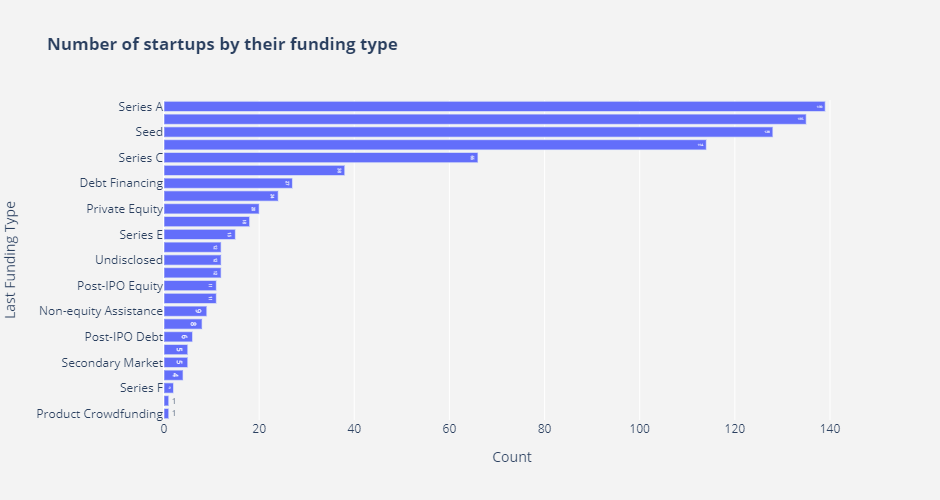

In [18]:
fig3 = go.Figure()

fig3.add_trace(
    go.Bar(
        x= main.groupby('Last funding type').size().sort_values().values,
        y= main.groupby('Last funding type').size().sort_values().index,
        text= main.groupby('Last funding type').size().sort_values().values,
        textposition= 'auto',
        orientation= 'h',
        )
        )

fig3.update_layout(
    title_text='<b>Number of startups by their funding type<b>',
    yaxis = dict(title='Last Funding Type'),
    xaxis = dict(title='Count'),
    width = 870,
    height = 500,
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)')

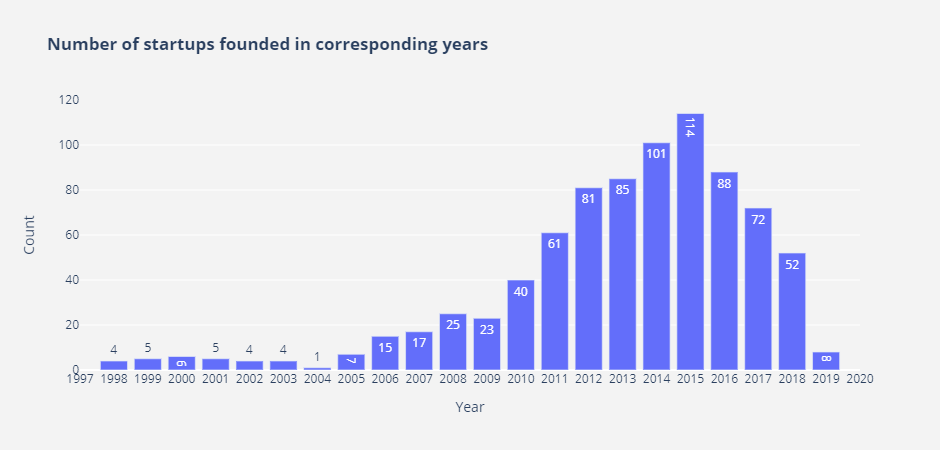

In [19]:
fig4 = go.Figure()

fig4.add_trace(
    go.Bar(
        x= main.groupby('Founded date').size().sort_index().index,
        y= main.groupby('Founded date').size().sort_index().values,
        text= main.groupby('Founded date').size().sort_index().values,
        textposition= 'auto'))

fig4.update_layout(
    title_text= '<b>Number of startups founded in corresponding years<b>',
    yaxis = dict(
        title= 'Count'),
    xaxis = dict(
        title= 'Year',
        tickmode= 'linear',
        range= [1997,2020]),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
    )



.

In [12]:
main.to_csv('../EDA/main.csv')